<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#はじめに" data-toc-modified-id="はじめに-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>はじめに</a></span></li><li><span><a href="#前準備" data-toc-modified-id="前準備-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>前準備</a></span><ul class="toc-item"><li><span><a href="#パッケージのインストール" data-toc-modified-id="パッケージのインストール-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>パッケージのインストール</a></span></li><li><span><a href="#パッケージの読み込み" data-toc-modified-id="パッケージの読み込み-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>パッケージの読み込み</a></span></li><li><span><a href="#画像表示用関数の定義" data-toc-modified-id="画像表示用関数の定義-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>画像表示用関数の定義</a></span></li></ul></li><li><span><a href="#全体の流れ" data-toc-modified-id="全体の流れ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>全体の流れ</a></span><ul class="toc-item"><li><span><a href="#結合対象画像の読み込み" data-toc-modified-id="結合対象画像の読み込み-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>結合対象画像の読み込み</a></span></li><li><span><a href="#出力画像サイズを計算し、空の画像を生成" data-toc-modified-id="出力画像サイズを計算し、空の画像を生成-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>出力画像サイズを計算し、空の画像を生成</a></span><ul class="toc-item"><li><span><a href="#出力サイズ" data-toc-modified-id="出力サイズ-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>出力サイズ</a></span></li><li><span><a href="#空の画像を生成" data-toc-modified-id="空の画像を生成-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>空の画像を生成</a></span></li></ul></li><li><span><a href="#読み込んだ画像を空の画像へ順次設定" data-toc-modified-id="読み込んだ画像を空の画像へ順次設定-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>読み込んだ画像を空の画像へ順次設定</a></span></li></ul></li><li><span><a href="#まとめ" data-toc-modified-id="まとめ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>まとめ</a></span><ul class="toc-item"><li><span><a href="#関数化" data-toc-modified-id="関数化-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>関数化</a></span></li><li><span><a href="#関数使用" data-toc-modified-id="関数使用-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>関数使用</a></span></li></ul></li></ul></div>

# はじめに


この notebook では複数画像を単純に横 or 縦に結合する方法について説明していきます


# 前準備


## パッケージのインストール


In [ ]:
%pip install numpy
%pip install matplotlib
%pip install opencv-python


## パッケージの読み込み


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


## 画像表示用関数の定義


In [3]:
def imgshow(src):
    # 複数枚
    if type(src) is list:
        fig = plt.figure(figsize=(8 * len(src), 16))
        for i, img in enumerate(src, 1):
            ax = fig.add_subplot(1, len(src), i)
            # グレースケール
            if img.ndim == 2:
                ax.imshow(img, cmap='gray', vmin=0, vmax=255)
            # BGR
            elif img.shape[2] == 3:
                ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
            # BGRA
            elif img.shape[2] == 4:
                ax.imshow(cv.cvtColor(img, cv.COLOR_BGRA2RGBA))
    # 1枚
    else:
        plt.figure(figsize=(8, 16))
        if src.ndim == 2:
            plt.imshow(src, cmap='gray', vmin=0, vmax=255)
        elif src.shape[2] == 3:
            plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
        elif src.shape[2] == 4:
            plt.imshow(cv.cvtColor(src, cv.COLOR_BGRA2RGBA))

    plt.show()


# 全体の流れ

1. 結合対象画像読み込み
2. 出力画像サイズを計算し、空の画像を生成
3. 読み込んだ画像を空の画像へ順次設定


## 結合対象画像の読み込み


今回は以下の 3 枚を使い説明していきます  
読み込みは

```c
cv.imread('画像のPath', 読み込み形式)
```

で行います  
読み込み形式は cv.IMREAD_UNCHANGED(BGR、アルファチャンネルが含まれる場合は BGRA)を指定します


In [4]:
# 結合対象画像をlistへ格納
images = []

for i, num in enumerate([256, 512, 1024], 1):
    img = cv.imread(f'pochi_{num}_{num}.png', cv.IMREAD_UNCHANGED)
    print(f'{i}枚目 : {img.shape[1]}px x {img.shape[1]}px')
    images.append(img)


1枚目 : 256px x 256px
2枚目 : 512px x 512px
3枚目 : 1024px x 1024px


## 出力画像サイズを計算し、空の画像を生成


### 出力サイズ

縦結合か横結合かで計算方法が異なります

- 縦結合  
  幅 : 入力画像の幅の最大値  
  高さ : 入力画像の高さの合計

- 横結合  
  幅 : 入力画像の幅の合計  
  高さ : 入力画像の高さの最大値


In [5]:
# 縦結合の場合
width = max(m.shape[1] for m in images)
height = sum(m.shape[0] for m in images)
print(f'Vertical width:{width}px height::{height}px')

# 縦結合の場合
width = sum(m.shape[1] for m in images)
height = max(m.shape[0] for m in images)
print(f'Horizontal width:{width}px height::{height}px')


Vertical width:1024px height::1792px
Horizontal width:1792px height::1024px


### 空の画像を生成

Python で OpenCv を使用する場合の画像のデータは  
**[高さ, 幅, 種別毎のパラメータ(BGR,BGRA 等)]** の配列(ndarray)となるので  
今回は背景透過(アルファチャンネルあり(種別毎のパラメータは BGRA の 4byte))で作成します  
(アルファチャンネルを 0(透明)で初期化します)

また、OpenCv は各色空間の上下限が 0-255 の byte 型なので、

```c
dtype=np.unit8
```

の指定も行ってください


In [6]:
output_img = np.zeros((height, width, 4), dtype=np.uint8)
print(
    f'OutputImage width:{output_img.shape[1]}px height::{output_img.shape[0]}px')


OutputImage width:1792px height::1024px


## 読み込んだ画像を空の画像へ順次設定


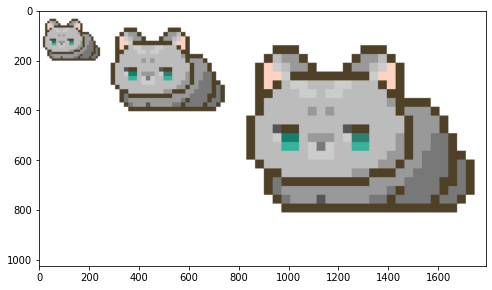

In [7]:
x = 0
y = 0

for img in images:
    # 入力画像がBGRAになるよう色空間を変更
    # グレースケール
    if img.ndim == 2:
        merge_img = cv.cvtColor(img, cv.COLOR_GRAY2BGRA)
    # BGR
    elif img.shape[2] == 3:
        merge_img = cv.cvtColor(img, cv.COLOR_BGR2BGRA)
    # BGRA
    elif img.shape[2] == 4:
        merge_img = img

    # 縦結合の場合
    # output_img[y: y + merge_img.shape[0], 0: merge_img.shape[1]] = merge_img
    # y += merge_img.shape[0]

    # 横結合の場合
    output_img[0: merge_img.shape[0], x: x + merge_img.shape[1]] = merge_img
    x += merge_img.shape[1]
imgshow(output_img)


# まとめ


## 関数化


In [8]:
from enum import IntEnum, auto


class SimpleMergeLayout(IntEnum):
    Vertical = auto()
    Horizontal = auto()


def simple_merge(images: list, layout: SimpleMergeLayout):
    x = 0
    y = 0

    if (layout != SimpleMergeLayout.Vertical) & (layout != SimpleMergeLayout.Horizontal):
        return

    if layout == SimpleMergeLayout.Vertical:
        # 縦結合の場合
        width = max(m.shape[1] for m in images)
        height = sum(m.shape[0] for m in images)
    elif layout == SimpleMergeLayout.Horizontal:
        # 縦結合の場合
        width = sum(m.shape[1] for m in images)
        height = max(m.shape[0] for m in images)

    output_img = np.zeros((height, width, 4), dtype=np.uint8)
    for img in images:
        # 入力画像がBGRAになるよう色空間を変更
        # グレースケール
        if img.ndim == 2:
            merge_img = cv.cvtColor(img, cv.COLOR_GRAY2BGRA)
        # BGR
        elif img.shape[2] == 3:
            merge_img = cv.cvtColor(img, cv.COLOR_BGR2BGRA)
        # BGRA
        elif img.shape[2] == 4:
            merge_img = img

        if layout == SimpleMergeLayout.Vertical:
            # 縦結合の場合
            output_img[y: y + merge_img.shape[0],
                       0: merge_img.shape[1]] = merge_img
            y += merge_img.shape[0]
        elif layout == SimpleMergeLayout.Horizontal:
            # 横結合の場合
            output_img[0: merge_img.shape[0], x: x +
                       merge_img.shape[1]] = merge_img
            x += merge_img.shape[1]
    return output_img


## 関数使用


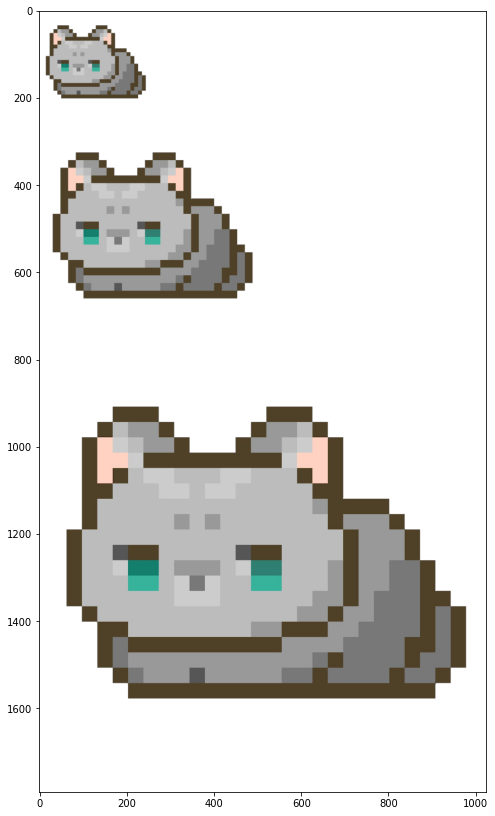

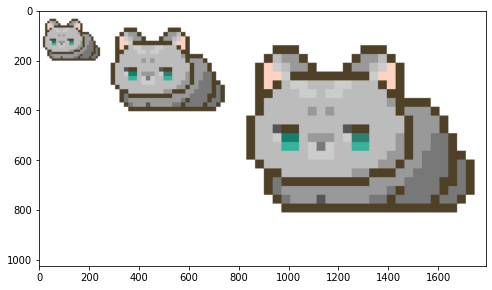

In [10]:
# 縦結合
img = simple_merge(images, SimpleMergeLayout.Vertical)
imgshow(img)
_ = cv.imwrite('simple_vertical.png', img)

# 横結合
img = simple_merge(images, SimpleMergeLayout.Horizontal)
imgshow(img)
_ = cv.imwrite('simple_horizontal.png', img)
